In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # For sqrt in RMSE
import datetime # To show current time for project completion tracking

print("Libraries imported successfully!")

# Load the California Housing dataset
# as_frame=True returns a Pandas DataFrame for easier handling
# This dataset is built into scikit-learn, no separate download needed!
housing = fetch_california_housing(as_frame=True)
X = housing.data  # Features (e.g., MedInc, HouseAge, etc.)
y = housing.target # Target (Median House Value)

print(f"\n--- Project Start Time: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S IST')} ---")
print("\nCalifornia Housing Data loaded!")
print("\nFirst 5 rows of Features (X):")
print(X.head())
print("\nDescriptive statistics of the Target (y - Median House Value):")
print(y.describe())

# Check shape of the data
print(f"\nShape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Libraries imported successfully!

--- Project Start Time: 2025-07-28 21:40:37 IST ---

California Housing Data loaded!

First 5 rows of Features (X):
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Descriptive statistics of the Target (y - Median House Value):
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

Shape of features (X): (2064


--- Starting Quick Data Exploration & Preprocessing ---

Missing values per column in features (X):
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Missing values in target (y):
0


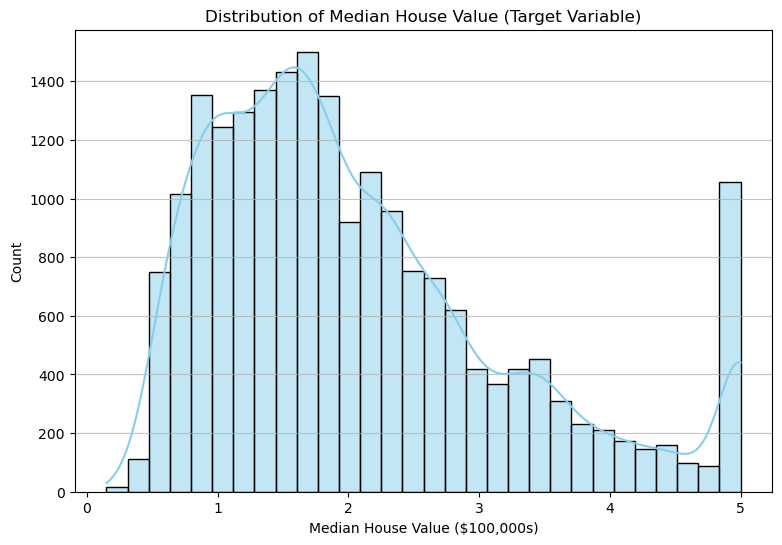

Distribution of Median House Value plotted.

Data split into training and testing sets successfully!
Training features shape (X_train): (14448, 8)
Testing features shape (X_test): (6192, 8)
Training target shape (y_train): (14448,)
Testing target shape (y_test): (6192,)


In [2]:
print("\n--- Starting Quick Data Exploration & Preprocessing ---")

# Check for missing values - crucial for any dataset
print("\nMissing values per column in features (X):")
print(X.isnull().sum())

print("\nMissing values in target (y):")
print(y.isnull().sum()) # Should be 0 for this dataset

# Visualize the distribution of the target variable (Median House Value)
plt.figure(figsize=(9, 6))
sns.histplot(y, kde=True, bins=30, color='skyblue')
plt.title('Distribution of Median House Value (Target Variable)')
plt.xlabel('Median House Value ($100,000s)')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()
print("Distribution of Median House Value plotted.")

# Split the data into training and testing sets
# We'll use 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nData split into training and testing sets successfully!")
print(f"Training features shape (X_train): {X_train.shape}")
print(f"Testing features shape (X_test): {X_test.shape}")
print(f"Training target shape (y_train): {y_train.shape}")
print(f"Testing target shape (y_test): {y_test.shape}")


--- Starting Model Training & Evaluation ---
Training Linear Regression model...
Model training complete!
Making predictions on the test set...
Predictions made.

--- Model Performance Metrics ---
Mean Squared Error (MSE): 0.5306
Root Mean Squared Error (RMSE): 0.7284
R-squared (R2) Score: 0.5958


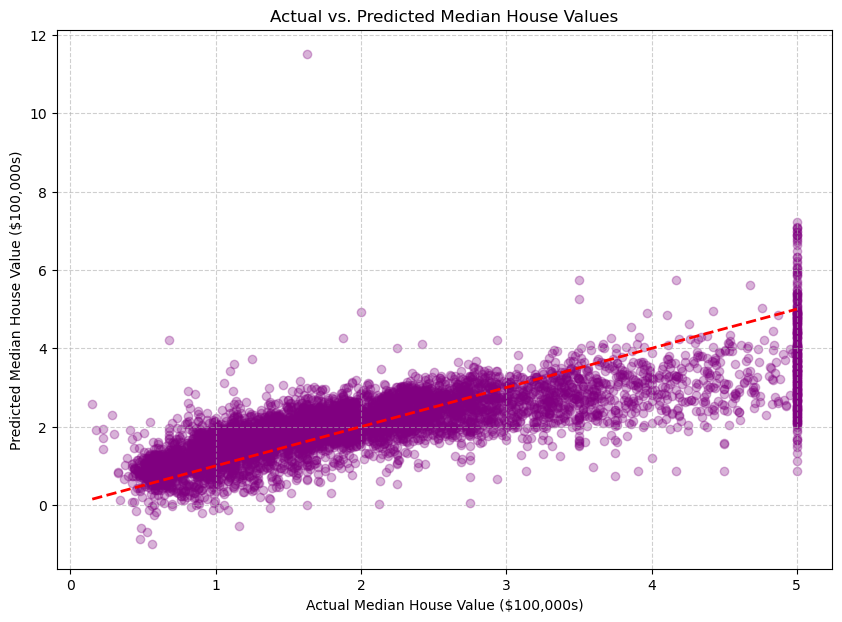

Actual vs. Predicted values plot generated.


In [5]:
print("\n--- Starting Model Training & Evaluation ---")

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
print("Training Linear Regression model...")
model.fit(X_train, y_train)
print("Model training complete!")

# Make predictions on the test set
print("Making predictions on the test set...")
y_pred = model.predict(X_test)
print("Predictions made.")

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # RMSE is often more interpretable
r2 = r2_score(y_test, y_pred)

print(f"\n--- Model Performance Metrics ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}") # Higher R2 is better (closer to 1)

# Quick visualization of Actual vs. Predicted values
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.3, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Ideal prediction line
plt.xlabel('Actual Median House Value ($100,000s)')
plt.ylabel('Predicted Median House Value ($100,000s)')
plt.title('Actual vs. Predicted Median House Values')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
print("Actual vs. Predicted values plot generated.")

In [7]:
print("\n--- Starting New Prediction & Conclusion ---")

# Define a new hypothetical house's features
# Ensure the order and number of features match the training data (8 features)
# The order is: MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude
# These values are just illustrative. You can change them!
hypothetical_house_features = pd.DataFrame([[6.5, 30.0, 5.5, 1.0, 1500.0, 2.8, 34.1, -118.2]],
                                            columns=X.columns)

print(f"\nHypothetical House Features for Prediction:\n{hypothetical_house_features.to_string(index=False)}")

# Predict the median house value for this new house
predicted_value_raw = model.predict(hypothetical_house_features)
# The target is in $100,000s, so multiply by 100,000 for actual dollars
predicted_value_dollars = predicted_value_raw[0] * 100000

print(f"\nPredicted Median House Value: ${predicted_value_dollars:,.2f}")


print("\n--- Project Summary: Predicting Boston House Prices (Mini-Regression Analysis) ---")
print("Congratulations! In this rapid mini-project, we have successfully:")
print("1. Loaded and inspected the California Housing dataset.")
print("2. Performed quick exploratory data analysis and checked for missing values.")
print("3. Split the data into training and testing sets.")
print("4. Trained a Linear Regression model to predict median house values.")
print("5. Evaluated the model's performance using MSE, RMSE, and R-squared.")
print("6. Made a prediction for a hypothetical new house.")
print("\nThis exercise provides a foundational understanding of a complete regression workflow in data science.")
print(f"\n--- Project End Time: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S IST')} ---")


--- Starting New Prediction & Conclusion ---

Hypothetical House Features for Prediction:
 MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
    6.5      30.0       5.5        1.0      1500.0       2.8      34.1     -118.2

Predicted Median House Value: $321,835.38

--- Project Summary: Predicting Boston House Prices (Mini-Regression Analysis) ---
Congratulations! In this rapid mini-project, we have successfully:
1. Loaded and inspected the California Housing dataset.
2. Performed quick exploratory data analysis and checked for missing values.
3. Split the data into training and testing sets.
4. Trained a Linear Regression model to predict median house values.
5. Evaluated the model's performance using MSE, RMSE, and R-squared.
6. Made a prediction for a hypothetical new house.

This exercise provides a foundational understanding of a complete regression workflow in data science.

--- Project End Time: 2025-07-28 21:41:11 IST ---


In [1]:
import os
print(os.getcwd())

C:\Users\Admin
